In [1]:
import tensorflow as tf
import tensorflow.keras.layers as layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop, SGD, Adam, Nadam

from tensorflow.keras.datasets import fashion_mnist

import numpy as np
from types import SimpleNamespace 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

img_width = 28
img_height = 28

labels = [
          "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
          "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
          ]

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# reshape input data
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# one hot encode outputs
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
num_classes = y_test.shape[1]


x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Val: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

4431872/4422102 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28, 1), y=(60000, 10)
Val: X=(5000, 28, 28, 1), y=(5000, 10)
Test: X=(5000, 28, 28, 1), y=(5000, 10)


# Part One

## 1) Train, Validate, Underfitting, and Overfitting

In [3]:
input = layers.Input(shape=(img_height, img_width, 1))
x = layers.BatchNormalization()(input)
x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)
x = layers.Dropout(0.25)(x)

x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)
x = layers.Dropout(0.25)(x)

x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.25)(x)

x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Activation('relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(10, activation='softmax')(x)

model = Model(input, output, name='fashion_model')

In [4]:
model.summary()

Model: "fashion_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 1)        4         
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)     

In [5]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"],
)

In [6]:
EPOCHS = 30
history = model.fit(x_train, y_train, batch_size=64, epochs=EPOCHS, validation_data=(x_val, y_val))

Epoch 1/30
938/938 [==============================] - 24s 11ms/step - loss: 0.5906 - accuracy: 0.7874 - val_loss: 0.3592 - val_accuracy: 0.8662
Epoch 2/30
938/938 [==============================] - 7s 7ms/step - loss: 0.3839 - accuracy: 0.8607 - val_loss: 0.3144 - val_accuracy: 0.8914
Epoch 3/30
938/938 [==============================] - 7s 7ms/step - loss: 0.3398 - accuracy: 0.8759 - val_loss: 0.2954 - val_accuracy: 0.8950
Epoch 4/30
938/938 [==============================] - 7s 7ms/step - loss: 0.3058 - accuracy: 0.8878 - val_loss: 0.3058 - val_accuracy: 0.8840
Epoch 5/30
938/938 [==============================] - 7s 7ms/step - loss: 0.2908 - accuracy: 0.8938 - val_loss: 0.2574 - val_accuracy: 0.9028
Epoch 6/30
938/938 [==============================] - 7s 7ms/step - loss: 0.2757 - accuracy: 0.8999 - val_loss: 0.2486 - val_accuracy: 0.9108
Epoch 7/30
938/938 [==============================] - 7s 7ms/step - loss: 0.2635 - accuracy: 0.9044 - val_loss: 0.2566 - val_accuracy: 0.9148
Epoc

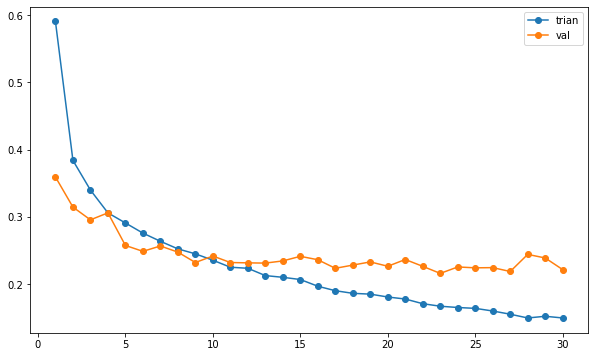

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, EPOCHS+1), history.history['loss'], marker='o')
plt.plot(range(1, EPOCHS+1), history.history['val_loss'], marker='o')
plt.legend(['trian', 'val'])
plt.show()

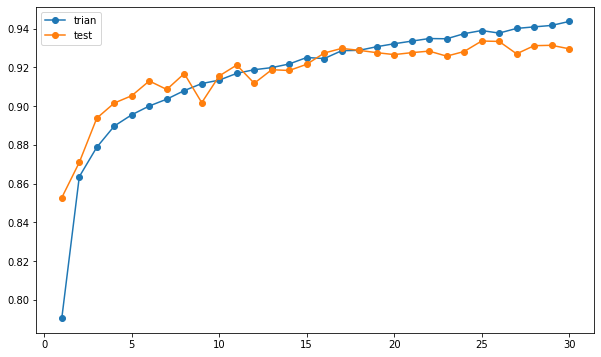

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, EPOCHS+1), history.history['accuracy'], marker='o')
plt.plot(range(1, EPOCHS+1), history.history['val_accuracy'], marker='o')
plt.legend(['trian', 'val'])
plt.show()

In [8]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

157/157 - 1s - loss: 0.2187 - accuracy: 0.9312 - 500ms/epoch - 3ms/step
Test loss: 0.21873630583286285
Test accuracy: 0.9312000274658203


### Underfitting

In [ ]:
input = layers.Input(shape=(img_width, img_height, 1))
x = layers.Conv2D(2, (15, 15), padding='same', activation='relu')(input)
x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)
x = layers.Dropout(0.5)(x)

x = layers.Flatten()(x)
x = layers.Dense(4)(x)
output = layers.Dense(10, activation='softmax')(x)

model = Model(input, output, name='fashion_model_underfit')
model.summary()

Model: "fashion_model_underfit"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 2)         452       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 2)        0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 2)         0         
                                                                 
 flatten_1 (Flatten)         (None, 392)               0         
                                                                 
 dense_2 (Dense)             (None, 4)                 1572      
                                            

In [ ]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(0.2),
    metrics=["accuracy"],
)
EPOCHS = 10
history = model.fit(x_train, y_train, batch_size=512, epochs=EPOCHS, validation_data=(x_val, y_val))

Epoch 1/10
118/118 [==============================] - 1s 7ms/step - loss: 1.1494 - accuracy: 0.5723 - val_loss: 0.7239 - val_accuracy: 0.7362
Epoch 2/10
118/118 [==============================] - 1s 5ms/step - loss: 0.7124 - accuracy: 0.7297 - val_loss: 0.7128 - val_accuracy: 0.7220
Epoch 3/10
118/118 [==============================] - 1s 5ms/step - loss: 0.6688 - accuracy: 0.7524 - val_loss: 0.6435 - val_accuracy: 0.7556
Epoch 4/10
118/118 [==============================] - 1s 5ms/step - loss: 0.6413 - accuracy: 0.7644 - val_loss: 0.6069 - val_accuracy: 0.7798
Epoch 5/10
118/118 [==============================] - 1s 5ms/step - loss: 0.6236 - accuracy: 0.7724 - val_loss: 0.5718 - val_accuracy: 0.7936
Epoch 6/10
118/118 [==============================] - 1s 5ms/step - loss: 0.6073 - accuracy: 0.7808 - val_loss: 0.5492 - val_accuracy: 0.8012
Epoch 7/10
118/118 [==============================] - 1s 5ms/step - loss: 0.5957 - accuracy: 0.7833 - val_loss: 0.5427 - val_accuracy: 0.8048
Epoch 

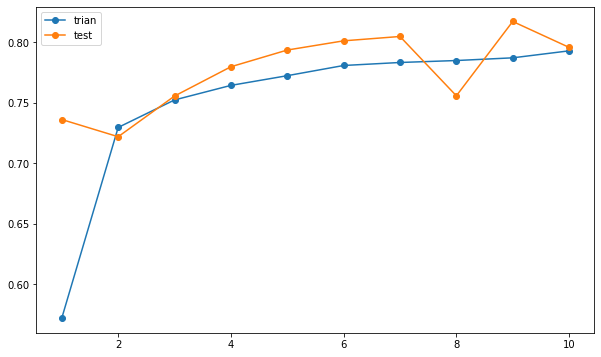

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, EPOCHS+1), history.history['accuracy'], marker='o')
plt.plot(range(1, EPOCHS+1), history.history['val_accuracy'], marker='o')
plt.legend(['trian', 'test'])
plt.show()

In [ ]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

157/157 - 0s - loss: 0.5330 - accuracy: 0.7988 - 360ms/epoch - 2ms/step
Test loss: 0.5330452919006348
Test accuracy: 0.798799991607666


### Overfitting

In [ ]:
input = layers.Input(shape=(img_height, img_width, 1))
x = layers.BatchNormalization()(input)
x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)

x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Conv2D(512, (3, 3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Flatten()(x)
x = layers.Dense(1024)(x)
output = layers.Dense(10, activation='softmax')(x)

model = Model(input, output, name='fashion_model_overfit')
model.summary()

Model: "fashion_model_overfit"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 batch_normalization_2 (Batc  (None, 28, 28, 1)        4         
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 batch_normalization_3 (Batc  (None, 14, 14, 

In [ ]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

EPOCHS = 20
history = model.fit(x_train, y_train, batch_size=64, epochs=EPOCHS, validation_data=(x_val, y_val))

Epoch 1/20
938/938 [==============================] - 12s 11ms/step - loss: 0.5557 - accuracy: 0.8373 - val_loss: 0.4463 - val_accuracy: 0.8472
Epoch 2/20
938/938 [==============================] - 10s 10ms/step - loss: 0.2711 - accuracy: 0.9043 - val_loss: 0.2932 - val_accuracy: 0.8994
Epoch 3/20
938/938 [==============================] - 10s 10ms/step - loss: 0.2221 - accuracy: 0.9207 - val_loss: 0.3567 - val_accuracy: 0.8732
Epoch 4/20
938/938 [==============================] - 10s 11ms/step - loss: 0.1875 - accuracy: 0.9328 - val_loss: 0.3265 - val_accuracy: 0.8736
Epoch 5/20
938/938 [==============================] - 10s 10ms/step - loss: 0.1609 - accuracy: 0.9423 - val_loss: 0.2627 - val_accuracy: 0.9164
Epoch 6/20
938/938 [==============================] - 10s 10ms/step - loss: 0.1373 - accuracy: 0.9512 - val_loss: 0.6033 - val_accuracy: 0.8676
Epoch 7/20
938/938 [==============================] - 10s 10ms/step - loss: 0.1177 - accuracy: 0.9586 - val_loss: 0.3743 - val_accuracy:

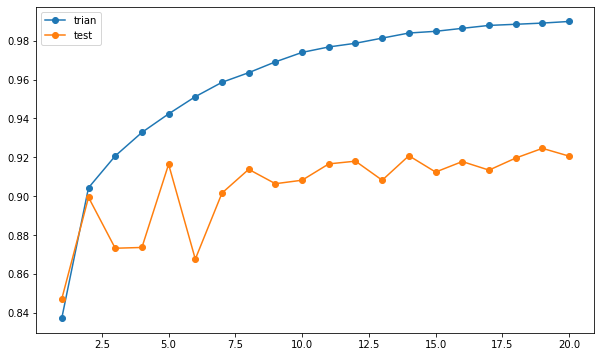

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, EPOCHS+1), history.history['accuracy'], marker='o')
plt.plot(range(1, EPOCHS+1), history.history['val_accuracy'], marker='o')
plt.legend(['trian', 'test'])
plt.show()

In [ ]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

157/157 - 1s - loss: 0.4833 - accuracy: 0.9204 - 620ms/epoch - 4ms/step
Test loss: 0.48334774374961853
Test accuracy: 0.9204000234603882


## 2) Hyperparameter Tuning

In [ ]:
%%capture
!pip3 install wandb
import wandb
from wandb.keras import WandbCallback

In [ ]:
sweep_config = {
    'method': 'random', #grid, random
    'metric': {
      'name': 'accuracy',
      'goal': 'maximize'   
    },
    'parameters': {
        'epochs': {
            'values': [2, 10, 20]
        },
        'batch_size': {
            'values': [128, 32]
        },
        'dropout': {
            'values': [0.35, 0.5]
        },
        'learning_rate': {
            'values': [6e-2, 1e-3, 3e-4]
        },
        # 'optimizer': {
        #     'values': ['adam', 'sgd', 'rmsprop']
        # }
    }
}

In [ ]:
sweep_id = wandb.sweep(sweep_config, entity="amir7d0", project="fashion_part2")

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Create sweep with ID: urkb8pum
Sweep URL: https://wandb.ai/amir7d0/fashion_part2/sweeps/urkb8pum


In [ ]:
def train():
    config_defaults = {
        'epochs': 1,
        'batch_size': 128,
        'learning_rate': 1e-3,
        'optimizer': 'adam',
        'dropout': 0.5,
    }

    # Initialize a new wandb run
    wandb.init(config=config_defaults)
    
    # Config is a variable that holds and saves hyperparameters and inputs
    config = wandb.config
    
    input = layers.Input(shape=(img_height, img_width, 1))
    x = layers.BatchNormalization()(input)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)
    x = layers.Dropout(config.dropout)(x)

    x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)
    x = layers.Dropout(config.dropout)(x)

    x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Dropout(config.dropout)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(256)(x)
    x = layers.Activation('relu')(x)
    x = layers.Dropout(config.dropout)(x)
    output = layers.Dense(10, activation='softmax')(x)

    model = Model(input, output, name='fashion_model2')
    
    
    # Define the optimizer
    if config.optimizer=='sgd':
      optimizer = SGD(lr=config.learning_rate)
    elif config.optimizer=='rmsprop':
      optimizer = RMSprop(lr=config.learning_rate, decay=1e-5)
    elif config.optimizer=='adam':
      optimizer = Adam(learning_rate=config.learning_rate, beta_1=0.9, beta_2=0.999, clipnorm=1.0)
    elif config.optimizer=='nadam':
      optimizer = Nadam(lr=config.learning_rate, beta_1=0.9, beta_2=0.999, clipnorm=1.0)
    else:
      optimizer = SGD(lr=config.learning_rate)

    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

    model.fit(x_train, y_train, batch_size=config.batch_size,
              epochs=config.epochs,
              validation_data=(x_val, y_val),
              callbacks=[WandbCallback(data_type="image", validation_data=(x_val, y_val), labels=labels)]
    )

In [ ]:
wandb.agent(sweep_id, train, count=50)

wandb: Agent Starting Run: pxj0b15a with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.5
wandb: 	epochs: 2
wandb: 	learning_rate: 0.0003
wandb: Currently logged in as: amir7d0. Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.
wandb: WARNING The data_type argument of wandb.keras.WandbCallback is deprecated and will be removed in a future release. Please use input_type instead.
wandb: WARNING Setting input_type = data_type.


Epoch 1/2
1875/1875 [==============================] - 21s 5ms/step - loss: 2.4289 - accuracy: 0.2795 - val_loss: 1.1487 - val_accuracy: 0.5916 - _timestamp: 1654238204.0000 - _runtime: 33.0000
Epoch 2/2
1875/1875 [==============================] - 10s 5ms/step - loss: 1.4322 - accuracy: 0.4636 - val_loss: 0.9753 - val_accuracy: 0.6430 - _timestamp: 1654238214.0000 - _runtime: 43.0000


wandb: Agent Starting Run: qbj6ltpn with config:
wandb: 	batch_size: 128
wandb: 	dropout: 0.5
wandb: 	epochs: 20
wandb: 	learning_rate: 0.06


Epoch 1/20
469/469 [==============================] - 9s 17ms/step - loss: 0.9611 - accuracy: 0.6497 - val_loss: 0.6008 - val_accuracy: 0.7620 - _timestamp: 1654238255.0000 - _runtime: 17.0000
Epoch 2/20
469/469 [==============================] - 7s 16ms/step - loss: 0.6221 - accuracy: 0.7657 - val_loss: 0.5270 - val_accuracy: 0.8018 - _timestamp: 1654238262.0000 - _runtime: 24.0000
Epoch 3/20
469/469 [==============================] - 7s 14ms/step - loss: 0.5525 - accuracy: 0.7943 - val_loss: 0.4866 - val_accuracy: 0.8262 - _timestamp: 1654238269.0000 - _runtime: 31.0000
Epoch 4/20
469/469 [==============================] - 6s 14ms/step - loss: 0.5087 - accuracy: 0.8110 - val_loss: 0.4652 - val_accuracy: 0.8424 - _timestamp: 1654238275.0000 - _runtime: 37.0000
Epoch 5/20
469/469 [==============================] - 7s 14ms/step - loss: 0.4776 - accuracy: 0.8219 - val_loss: 0.4580 - val_accuracy: 0.8356 - _timestamp: 1654238282.0000 - _runtime: 44.0000
Epoch 6/20
469/469 [===============

wandb: Agent Starting Run: ly94etdn with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.5
wandb: 	epochs: 2
wandb: 	learning_rate: 0.06


Epoch 1/2
1875/1875 [==============================] - 10s 5ms/step - loss: 0.8971 - accuracy: 0.6743 - val_loss: 0.5962 - val_accuracy: 0.7904 - _timestamp: 1654238413.0000 - _runtime: 18.0000
Epoch 2/2
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5959 - accuracy: 0.7821 - val_loss: 0.4904 - val_accuracy: 0.8344 - _timestamp: 1654238424.0000 - _runtime: 29.0000


wandb: Agent Starting Run: z36vnyja with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.5
wandb: 	epochs: 10
wandb: 	learning_rate: 0.001


Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.6904 - accuracy: 0.4317 - val_loss: 0.8858 - val_accuracy: 0.6890 - _timestamp: 1654238464.0000 - _runtime: 18.0000
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.9764 - accuracy: 0.6323 - val_loss: 0.7663 - val_accuracy: 0.7160 - _timestamp: 1654238474.0000 - _runtime: 28.0000
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.8334 - accuracy: 0.6869 - val_loss: 0.7166 - val_accuracy: 0.7306 - _timestamp: 1654238484.0000 - _runtime: 38.0000
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7644 - accuracy: 0.7123 - val_loss: 0.6706 - val_accuracy: 0.7438 - _timestamp: 1654238494.0000 - _runtime: 48.0000
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7221 - accuracy: 0.7281 - val_loss: 0.6576 - val_accuracy: 0.7496 - _timestamp: 1654238504.0000 - _runtime: 58.0000
Epoch 6/10
1875/1875 [===

wandb: Agent Starting Run: 74gj42a5 with config:
wandb: 	batch_size: 128
wandb: 	dropout: 0.35
wandb: 	epochs: 20
wandb: 	learning_rate: 0.0003


Epoch 1/20
469/469 [==============================] - 7s 14ms/step - loss: 2.6747 - accuracy: 0.2359 - val_loss: 1.7154 - val_accuracy: 0.4722 - _timestamp: 1654238582.0000 - _runtime: 15.0000
Epoch 2/20
469/469 [==============================] - 7s 14ms/step - loss: 1.7156 - accuracy: 0.4066 - val_loss: 1.2381 - val_accuracy: 0.5782 - _timestamp: 1654238589.0000 - _runtime: 22.0000
Epoch 3/20
469/469 [==============================] - 7s 14ms/step - loss: 1.4275 - accuracy: 0.4907 - val_loss: 1.0941 - val_accuracy: 0.6202 - _timestamp: 1654238595.0000 - _runtime: 28.0000
Epoch 4/20
469/469 [==============================] - 7s 14ms/step - loss: 1.2713 - accuracy: 0.5375 - val_loss: 1.0047 - val_accuracy: 0.6446 - _timestamp: 1654238602.0000 - _runtime: 35.0000
Epoch 5/20
469/469 [==============================] - 7s 15ms/step - loss: 1.1626 - accuracy: 0.5760 - val_loss: 0.9425 - val_accuracy: 0.6608 - _timestamp: 1654238609.0000 - _runtime: 42.0000
Epoch 6/20
469/469 [===============

wandb: Agent Starting Run: yeced4a4 with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.5
wandb: 	epochs: 2
wandb: 	learning_rate: 0.0003


Epoch 1/2
1875/1875 [==============================] - 11s 5ms/step - loss: 2.5037 - accuracy: 0.2713 - val_loss: 1.2452 - val_accuracy: 0.5458 - _timestamp: 1654238748.0000 - _runtime: 18.0000
Epoch 2/2
1875/1875 [==============================] - 10s 5ms/step - loss: 1.4927 - accuracy: 0.4501 - val_loss: 1.0523 - val_accuracy: 0.6138 - _timestamp: 1654238758.0000 - _runtime: 28.0000


wandb: Agent Starting Run: ymuo0bc5 with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.5
wandb: 	epochs: 10
wandb: 	learning_rate: 0.001


Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.7786 - accuracy: 0.3974 - val_loss: 0.9744 - val_accuracy: 0.6614 - _timestamp: 1654238788.0000 - _runtime: 18.0000
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.1017 - accuracy: 0.5723 - val_loss: 0.8209 - val_accuracy: 0.7000 - _timestamp: 1654238799.0000 - _runtime: 29.0000
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.9078 - accuracy: 0.6529 - val_loss: 0.7592 - val_accuracy: 0.7160 - _timestamp: 1654238809.0000 - _runtime: 39.0000
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.8169 - accuracy: 0.6878 - val_loss: 0.7071 - val_accuracy: 0.7344 - _timestamp: 1654238818.0000 - _runtime: 48.0000
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7618 - accuracy: 0.7095 - val_loss: 0.6787 - val_accuracy: 0.7434 - _timestamp: 1654238829.0000 - _runtime: 59.0000
Epoch 6/10
1875/1875 [===

wandb: Agent Starting Run: 0hewovi1 with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.5
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0003


Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.5064 - accuracy: 0.2688 - val_loss: 1.1973 - val_accuracy: 0.5284 - _timestamp: 1654238950.0000 - _runtime: 18.0000
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.4333 - accuracy: 0.4654 - val_loss: 1.0172 - val_accuracy: 0.6156 - _timestamp: 1654238960.0000 - _runtime: 28.0000
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.1738 - accuracy: 0.5550 - val_loss: 0.9294 - val_accuracy: 0.6576 - _timestamp: 1654238970.0000 - _runtime: 38.0000
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.0407 - accuracy: 0.6052 - val_loss: 0.9049 - val_accuracy: 0.6622 - _timestamp: 1654238980.0000 - _runtime: 48.0000
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.9649 - accuracy: 0.6378 - val_loss: 0.8651 - val_accuracy: 0.6766 - _timestamp: 1654238990.0000 - _runtime: 58.0000
Epoch 6/10
1875/1875 [===

wandb: Agent Starting Run: b4dno0j7 with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.35
wandb: 	epochs: 2
wandb: 	learning_rate: 0.06


Epoch 1/2
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6770 - accuracy: 0.7574 - val_loss: 0.4078 - val_accuracy: 0.8468 - _timestamp: 1654239112.0000 - _runtime: 18.0000
Epoch 2/2
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4497 - accuracy: 0.8329 - val_loss: 0.3540 - val_accuracy: 0.8708 - _timestamp: 1654239122.0000 - _runtime: 28.0000


wandb: Agent Starting Run: gp0s2ak6 with config:
wandb: 	batch_size: 128
wandb: 	dropout: 0.35
wandb: 	epochs: 10
wandb: 	learning_rate: 0.06


Epoch 1/10
469/469 [==============================] - 7s 15ms/step - loss: 0.7293 - accuracy: 0.7378 - val_loss: 0.5324 - val_accuracy: 0.8142 - _timestamp: 1654239149.0000 - _runtime: 15.0000
Epoch 2/10
469/469 [==============================] - 7s 15ms/step - loss: 0.4666 - accuracy: 0.8281 - val_loss: 0.3922 - val_accuracy: 0.8556 - _timestamp: 1654239156.0000 - _runtime: 22.0000
Epoch 3/10
469/469 [==============================] - 7s 14ms/step - loss: 0.4077 - accuracy: 0.8475 - val_loss: 0.3851 - val_accuracy: 0.8622 - _timestamp: 1654239163.0000 - _runtime: 29.0000
Epoch 4/10
469/469 [==============================] - 7s 14ms/step - loss: 0.3776 - accuracy: 0.8595 - val_loss: 0.3665 - val_accuracy: 0.8696 - _timestamp: 1654239169.0000 - _runtime: 35.0000
Epoch 5/10
469/469 [==============================] - 7s 14ms/step - loss: 0.3539 - accuracy: 0.8678 - val_loss: 0.3379 - val_accuracy: 0.8742 - _timestamp: 1654239176.0000 - _runtime: 42.0000
Epoch 6/10
469/469 [===============

wandb: Agent Starting Run: qudl8b4j with config:
wandb: 	batch_size: 128
wandb: 	dropout: 0.35
wandb: 	epochs: 10
wandb: 	learning_rate: 0.06


Epoch 1/10
469/469 [==============================] - 7s 14ms/step - loss: 0.7036 - accuracy: 0.7464 - val_loss: 0.6020 - val_accuracy: 0.7876 - _timestamp: 1654239250.0000 - _runtime: 15.0000
Epoch 2/10
469/469 [==============================] - 7s 14ms/step - loss: 0.4622 - accuracy: 0.8282 - val_loss: 0.4107 - val_accuracy: 0.8454 - _timestamp: 1654239257.0000 - _runtime: 22.0000
Epoch 3/10
469/469 [==============================] - 7s 14ms/step - loss: 0.4099 - accuracy: 0.8469 - val_loss: 0.3748 - val_accuracy: 0.8622 - _timestamp: 1654239264.0000 - _runtime: 29.0000
Epoch 4/10
469/469 [==============================] - 7s 14ms/step - loss: 0.3773 - accuracy: 0.8590 - val_loss: 0.3628 - val_accuracy: 0.8706 - _timestamp: 1654239270.0000 - _runtime: 35.0000
Epoch 5/10
469/469 [==============================] - 7s 14ms/step - loss: 0.3541 - accuracy: 0.8668 - val_loss: 0.3213 - val_accuracy: 0.8792 - _timestamp: 1654239277.0000 - _runtime: 42.0000
Epoch 6/10
469/469 [===============

wandb: Agent Starting Run: 4gcufkdt with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.5
wandb: 	epochs: 10
wandb: 	learning_rate: 0.001


Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 1.7131 - accuracy: 0.4153 - val_loss: 1.0720 - val_accuracy: 0.5888 - _timestamp: 1654239340.0000 - _runtime: 18.0000
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.0024 - accuracy: 0.6209 - val_loss: 0.8480 - val_accuracy: 0.6858 - _timestamp: 1654239350.0000 - _runtime: 28.0000
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.8510 - accuracy: 0.6787 - val_loss: 0.7721 - val_accuracy: 0.7122 - _timestamp: 1654239360.0000 - _runtime: 38.0000
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.7732 - accuracy: 0.7083 - val_loss: 0.6997 - val_accuracy: 0.7324 - _timestamp: 1654239371.0000 - _runtime: 49.0000
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7316 - accuracy: 0.7230 - val_loss: 0.6705 - val_accuracy: 0.7466 - _timestamp: 1654239381.0000 - _runtime: 59.0000
Epoch 6/10
1875/1875 [===

wandb: Agent Starting Run: qbt3lmv2 with config:
wandb: 	batch_size: 128
wandb: 	dropout: 0.5
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0003


Epoch 1/10
469/469 [==============================] - 7s 15ms/step - loss: 3.8668 - accuracy: 0.1515 - val_loss: 1.9244 - val_accuracy: 0.3686 - _timestamp: 1654239499.0000 - _runtime: 15.0000
Epoch 2/10
469/469 [==============================] - 7s 15ms/step - loss: 2.4470 - accuracy: 0.2400 - val_loss: 1.5278 - val_accuracy: 0.5496 - _timestamp: 1654239506.0000 - _runtime: 22.0000
Epoch 3/10
469/469 [==============================] - 7s 14ms/step - loss: 2.0464 - accuracy: 0.2989 - val_loss: 1.3661 - val_accuracy: 0.5864 - _timestamp: 1654239512.0000 - _runtime: 28.0000
Epoch 4/10
469/469 [==============================] - 7s 15ms/step - loss: 1.8252 - accuracy: 0.3521 - val_loss: 1.2702 - val_accuracy: 0.5960 - _timestamp: 1654239519.0000 - _runtime: 35.0000
Epoch 5/10
469/469 [==============================] - 7s 15ms/step - loss: 1.6758 - accuracy: 0.3909 - val_loss: 1.1979 - val_accuracy: 0.6114 - _timestamp: 1654239526.0000 - _runtime: 42.0000
Epoch 6/10
469/469 [===============

wandb: Agent Starting Run: sd49cwgx with config:
wandb: 	batch_size: 128
wandb: 	dropout: 0.35
wandb: 	epochs: 2
wandb: 	learning_rate: 0.001


Epoch 1/2
469/469 [==============================] - 8s 15ms/step - loss: 1.8671 - accuracy: 0.4017 - val_loss: 1.3565 - val_accuracy: 0.6830 - _timestamp: 1654239600.0000 - _runtime: 15.0000
Epoch 2/2
469/469 [==============================] - 7s 14ms/step - loss: 1.1001 - accuracy: 0.5999 - val_loss: 0.8354 - val_accuracy: 0.7062 - _timestamp: 1654239607.0000 - _runtime: 22.0000


wandb: Agent Starting Run: u0oug3ew with config:
wandb: 	batch_size: 128
wandb: 	dropout: 0.35
wandb: 	epochs: 2
wandb: 	learning_rate: 0.0003


Epoch 1/2
469/469 [==============================] - 8s 15ms/step - loss: 2.5487 - accuracy: 0.2587 - val_loss: 1.7239 - val_accuracy: 0.5470 - _timestamp: 1654239641.0000 - _runtime: 16.0000
Epoch 2/2
469/469 [==============================] - 7s 15ms/step - loss: 1.6550 - accuracy: 0.4252 - val_loss: 1.1920 - val_accuracy: 0.6324 - _timestamp: 1654239648.0000 - _runtime: 23.0000


wandb: Agent Starting Run: mk3piudm with config:
wandb: 	batch_size: 128
wandb: 	dropout: 0.35
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0003


Epoch 1/10
469/469 [==============================] - 8s 15ms/step - loss: 2.6067 - accuracy: 0.2399 - val_loss: 1.6825 - val_accuracy: 0.5188 - _timestamp: 1654239676.0000 - _runtime: 15.0000
Epoch 2/10
469/469 [==============================] - 7s 15ms/step - loss: 1.7323 - accuracy: 0.3941 - val_loss: 1.2032 - val_accuracy: 0.6306 - _timestamp: 1654239683.0000 - _runtime: 22.0000
Epoch 3/10
469/469 [==============================] - 7s 15ms/step - loss: 1.4599 - accuracy: 0.4715 - val_loss: 1.0624 - val_accuracy: 0.6662 - _timestamp: 1654239690.0000 - _runtime: 29.0000
Epoch 4/10
469/469 [==============================] - 7s 15ms/step - loss: 1.3058 - accuracy: 0.5190 - val_loss: 0.9802 - val_accuracy: 0.6794 - _timestamp: 1654239697.0000 - _runtime: 36.0000
Epoch 5/10
469/469 [==============================] - 7s 15ms/step - loss: 1.1939 - accuracy: 0.5594 - val_loss: 0.9225 - val_accuracy: 0.6888 - _timestamp: 1654239704.0000 - _runtime: 43.0000
Epoch 6/10
469/469 [===============

wandb: Agent Starting Run: 395vtu3z with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.35
wandb: 	epochs: 20
wandb: 	learning_rate: 0.06


Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 0.6606 - accuracy: 0.7624 - val_loss: 0.4149 - val_accuracy: 0.8424 - _timestamp: 1654239780.0000 - _runtime: 18.0000
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4437 - accuracy: 0.8382 - val_loss: 0.3663 - val_accuracy: 0.8714 - _timestamp: 1654239791.0000 - _runtime: 29.0000
Epoch 3/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3897 - accuracy: 0.8562 - val_loss: 0.3376 - val_accuracy: 0.8744 - _timestamp: 1654239801.0000 - _runtime: 39.0000
Epoch 4/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3589 - accuracy: 0.8673 - val_loss: 0.3299 - val_accuracy: 0.8838 - _timestamp: 1654239812.0000 - _runtime: 50.0000
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3394 - accuracy: 0.8753 - val_loss: 0.3360 - val_accuracy: 0.8850 - _timestamp: 1654239822.0000 - _runtime: 60.0000
Epoch 6/20
1875/1875 [===

wandb: Agent Starting Run: txamq7en with config:
wandb: 	batch_size: 128
wandb: 	dropout: 0.5
wandb: 	epochs: 20
wandb: 	learning_rate: 0.001


Epoch 1/20
469/469 [==============================] - 8s 15ms/step - loss: 2.7238 - accuracy: 0.2538 - val_loss: 1.5099 - val_accuracy: 0.5102 - _timestamp: 1654240057.0000 - _runtime: 16.0000
Epoch 2/20
469/469 [==============================] - 7s 15ms/step - loss: 1.6694 - accuracy: 0.3997 - val_loss: 1.1815 - val_accuracy: 0.6094 - _timestamp: 1654240064.0000 - _runtime: 23.0000
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 1.4002 - accuracy: 0.4802 - val_loss: 1.0533 - val_accuracy: 0.6474 - _timestamp: 1654240070.0000 - _runtime: 29.0000
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 1.2460 - accuracy: 0.5314 - val_loss: 0.9609 - val_accuracy: 0.6718 - _timestamp: 1654240078.0000 - _runtime: 37.0000
Epoch 5/20
469/469 [==============================] - 7s 15ms/step - loss: 1.1254 - accuracy: 0.5768 - val_loss: 0.9001 - val_accuracy: 0.6830 - _timestamp: 1654240084.0000 - _runtime: 43.0000
Epoch 6/20
469/469 [===============

wandb: Agent Starting Run: jisfhe9y with config:
wandb: 	batch_size: 128
wandb: 	dropout: 0.5
wandb: 	epochs: 20
wandb: 	learning_rate: 0.06


Epoch 1/20
469/469 [==============================] - 7s 15ms/step - loss: 0.9679 - accuracy: 0.6519 - val_loss: 0.6349 - val_accuracy: 0.7602 - _timestamp: 1654240214.0000 - _runtime: 15.0000
Epoch 2/20
469/469 [==============================] - 7s 15ms/step - loss: 0.6293 - accuracy: 0.7590 - val_loss: 0.5390 - val_accuracy: 0.7870 - _timestamp: 1654240220.0000 - _runtime: 21.0000
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 0.5549 - accuracy: 0.7915 - val_loss: 0.5187 - val_accuracy: 0.8180 - _timestamp: 1654240228.0000 - _runtime: 29.0000
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 0.5126 - accuracy: 0.8096 - val_loss: 0.4569 - val_accuracy: 0.8382 - _timestamp: 1654240235.0000 - _runtime: 36.0000
Epoch 5/20
469/469 [==============================] - 7s 15ms/step - loss: 0.4815 - accuracy: 0.8205 - val_loss: 0.4442 - val_accuracy: 0.8450 - _timestamp: 1654240242.0000 - _runtime: 43.0000
Epoch 6/20
469/469 [===============

wandb: Agent Starting Run: nfx8jw73 with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.35
wandb: 	epochs: 20
wandb: 	learning_rate: 0.001


Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 1.1906 - accuracy: 0.5843 - val_loss: 0.7419 - val_accuracy: 0.7372 - _timestamp: 1654240374.0000 - _runtime: 18.0000
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7463 - accuracy: 0.7229 - val_loss: 0.6332 - val_accuracy: 0.7732 - _timestamp: 1654240385.0000 - _runtime: 29.0000
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6565 - accuracy: 0.7547 - val_loss: 0.5809 - val_accuracy: 0.7898 - _timestamp: 1654240395.0000 - _runtime: 39.0000
Epoch 4/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.6090 - accuracy: 0.7724 - val_loss: 0.5384 - val_accuracy: 0.8050 - _timestamp: 1654240406.0000 - _runtime: 50.0000
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5720 - accuracy: 0.7875 - val_loss: 0.5134 - val_accuracy: 0.8132 - _timestamp: 1654240417.0000 - _runtime: 61.0000
Epoch 6/20
1875/1875 [===

wandb: Agent Starting Run: ztvuz5u7 with config:
wandb: 	batch_size: 128
wandb: 	dropout: 0.35
wandb: 	epochs: 2
wandb: 	learning_rate: 0.06


Epoch 1/2
469/469 [==============================] - 8s 15ms/step - loss: 0.7409 - accuracy: 0.7351 - val_loss: 0.5444 - val_accuracy: 0.8022 - _timestamp: 1654240654.0000 - _runtime: 15.0000
Epoch 2/2
469/469 [==============================] - 7s 15ms/step - loss: 0.4749 - accuracy: 0.8233 - val_loss: 0.4369 - val_accuracy: 0.8428 - _timestamp: 1654240661.0000 - _runtime: 22.0000


wandb: Agent Starting Run: 4n893841 with config:
wandb: 	batch_size: 128
wandb: 	dropout: 0.35
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0003


Epoch 1/10
469/469 [==============================] - 8s 15ms/step - loss: 2.6297 - accuracy: 0.2478 - val_loss: 1.7276 - val_accuracy: 0.5638 - _timestamp: 1654240700.0000 - _runtime: 15.0000
Epoch 2/10
469/469 [==============================] - 7s 15ms/step - loss: 1.6862 - accuracy: 0.4177 - val_loss: 1.1662 - val_accuracy: 0.6576 - _timestamp: 1654240707.0000 - _runtime: 22.0000
Epoch 3/10
469/469 [==============================] - 7s 15ms/step - loss: 1.4029 - accuracy: 0.4978 - val_loss: 1.0201 - val_accuracy: 0.6866 - _timestamp: 1654240714.0000 - _runtime: 29.0000
Epoch 4/10
469/469 [==============================] - 7s 15ms/step - loss: 1.2288 - accuracy: 0.5565 - val_loss: 0.9294 - val_accuracy: 0.7026 - _timestamp: 1654240721.0000 - _runtime: 36.0000
Epoch 5/10
469/469 [==============================] - 7s 15ms/step - loss: 1.1260 - accuracy: 0.5919 - val_loss: 0.8703 - val_accuracy: 0.7152 - _timestamp: 1654240728.0000 - _runtime: 43.0000
Epoch 6/10
469/469 [===============

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: opl57cye with config:
wandb: 	batch_size: 128
wandb: 	dropout: 0.35
wandb: 	epochs: 2
wandb: 	learning_rate: 0.0003


Epoch 1/2
469/469 [==============================] - 8s 15ms/step - loss: 2.5778 - accuracy: 0.2503 - val_loss: 1.6991 - val_accuracy: 0.5568 - _timestamp: 1654240809.0000 - _runtime: 15.0000
Epoch 2/2
469/469 [==============================] - 7s 15ms/step - loss: 1.6583 - accuracy: 0.4290 - val_loss: 1.1168 - val_accuracy: 0.6622 - _timestamp: 1654240816.0000 - _runtime: 22.0000


wandb: Agent Starting Run: 7apl16hy with config:
wandb: 	batch_size: 128
wandb: 	dropout: 0.35
wandb: 	epochs: 10
wandb: 	learning_rate: 0.001


Epoch 1/10
469/469 [==============================] - 8s 15ms/step - loss: 1.8150 - accuracy: 0.4078 - val_loss: 1.4171 - val_accuracy: 0.6824 - _timestamp: 1654240845.0000 - _runtime: 15.0000
Epoch 2/10
469/469 [==============================] - 7s 15ms/step - loss: 1.0746 - accuracy: 0.6106 - val_loss: 0.8341 - val_accuracy: 0.7112 - _timestamp: 1654240852.0000 - _runtime: 22.0000
Epoch 3/10
469/469 [==============================] - 7s 15ms/step - loss: 0.9135 - accuracy: 0.6656 - val_loss: 0.7509 - val_accuracy: 0.7340 - _timestamp: 1654240859.0000 - _runtime: 29.0000
Epoch 4/10
469/469 [==============================] - 7s 15ms/step - loss: 0.8314 - accuracy: 0.6959 - val_loss: 0.7076 - val_accuracy: 0.7446 - _timestamp: 1654240866.0000 - _runtime: 36.0000
Epoch 5/10
469/469 [==============================] - 7s 15ms/step - loss: 0.7813 - accuracy: 0.7132 - val_loss: 0.6729 - val_accuracy: 0.7564 - _timestamp: 1654240873.0000 - _runtime: 43.0000
Epoch 6/10
469/469 [===============

wandb: Agent Starting Run: i3k7bncz with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.5
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0003


Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.5121 - accuracy: 0.2607 - val_loss: 1.3277 - val_accuracy: 0.5732 - _timestamp: 1654240940.0000 - _runtime: 19.0000
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.5396 - accuracy: 0.4294 - val_loss: 1.0717 - val_accuracy: 0.6324 - _timestamp: 1654240951.0000 - _runtime: 30.0000
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 1.2771 - accuracy: 0.5178 - val_loss: 0.9385 - val_accuracy: 0.6754 - _timestamp: 1654240961.0000 - _runtime: 40.0000
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 1.1219 - accuracy: 0.5775 - val_loss: 0.8593 - val_accuracy: 0.6898 - _timestamp: 1654240972.0000 - _runtime: 51.0000
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 1.0246 - accuracy: 0.6180 - val_loss: 0.8248 - val_accuracy: 0.6968 - _timestamp: 1654240982.0000 - _runtime: 61.0000
Epoch 6/10
1875/1875 [===

wandb: Agent Starting Run: d75bzo8u with config:
wandb: 	batch_size: 128
wandb: 	dropout: 0.5
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0003


Epoch 1/10
469/469 [==============================] - 8s 15ms/step - loss: 3.8124 - accuracy: 0.1528 - val_loss: 1.9721 - val_accuracy: 0.2754 - _timestamp: 1654241098.0000 - _runtime: 15.0000
Epoch 2/10
469/469 [==============================] - 7s 15ms/step - loss: 2.4266 - accuracy: 0.2387 - val_loss: 1.5035 - val_accuracy: 0.5080 - _timestamp: 1654241105.0000 - _runtime: 22.0000
Epoch 3/10
469/469 [==============================] - 7s 15ms/step - loss: 2.0159 - accuracy: 0.3056 - val_loss: 1.3219 - val_accuracy: 0.5686 - _timestamp: 1654241112.0000 - _runtime: 29.0000
Epoch 4/10
469/469 [==============================] - 7s 15ms/step - loss: 1.7960 - accuracy: 0.3578 - val_loss: 1.2215 - val_accuracy: 0.5832 - _timestamp: 1654241120.0000 - _runtime: 37.0000
Epoch 5/10
469/469 [==============================] - 7s 16ms/step - loss: 1.6357 - accuracy: 0.4015 - val_loss: 1.1505 - val_accuracy: 0.6002 - _timestamp: 1654241127.0000 - _runtime: 44.0000
Epoch 6/10
469/469 [===============

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: a61ofs1h with config:
wandb: 	batch_size: 128
wandb: 	dropout: 0.5
wandb: 	epochs: 2
wandb: 	learning_rate: 0.001


Epoch 1/2
469/469 [==============================] - 8s 15ms/step - loss: 2.6414 - accuracy: 0.2666 - val_loss: 1.4338 - val_accuracy: 0.5260 - _timestamp: 1654241204.0000 - _runtime: 15.0000
Epoch 2/2
469/469 [==============================] - 7s 15ms/step - loss: 1.6305 - accuracy: 0.4022 - val_loss: 1.1701 - val_accuracy: 0.5982 - _timestamp: 1654241211.0000 - _runtime: 22.0000


wandb: Agent Starting Run: w71efych with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.35
wandb: 	epochs: 20
wandb: 	learning_rate: 0.001


Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 1.1983 - accuracy: 0.5769 - val_loss: 0.7008 - val_accuracy: 0.7528 - _timestamp: 1654241248.0000 - _runtime: 18.0000
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7394 - accuracy: 0.7233 - val_loss: 0.6232 - val_accuracy: 0.7706 - _timestamp: 1654241259.0000 - _runtime: 29.0000
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6574 - accuracy: 0.7522 - val_loss: 0.5747 - val_accuracy: 0.7878 - _timestamp: 1654241270.0000 - _runtime: 40.0000
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6066 - accuracy: 0.7730 - val_loss: 0.5357 - val_accuracy: 0.8034 - _timestamp: 1654241281.0000 - _runtime: 51.0000
Epoch 5/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.5757 - accuracy: 0.7833 - val_loss: 0.5140 - val_accuracy: 0.8122 - _timestamp: 1654241292.0000 - _runtime: 62.0000
Epoch 6/20
1875/1875 [===

wandb: Agent Starting Run: umvtgr5p with config:
wandb: 	batch_size: 128
wandb: 	dropout: 0.5
wandb: 	epochs: 2
wandb: 	learning_rate: 0.0003


Epoch 1/2
469/469 [==============================] - 8s 15ms/step - loss: 3.8133 - accuracy: 0.1651 - val_loss: 1.7856 - val_accuracy: 0.4326 - _timestamp: 1654241478.0000 - _runtime: 15.0000
Epoch 2/2
469/469 [==============================] - 7s 15ms/step - loss: 2.3951 - accuracy: 0.2533 - val_loss: 1.4326 - val_accuracy: 0.5212 - _timestamp: 1654241485.0000 - _runtime: 22.0000


wandb: Agent Starting Run: 2bh4syfp with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.5
wandb: 	epochs: 2
wandb: 	learning_rate: 0.0003


Epoch 1/2
1875/1875 [==============================] - 11s 6ms/step - loss: 2.4314 - accuracy: 0.2819 - val_loss: 1.2509 - val_accuracy: 0.5716 - _timestamp: 1654241522.0000 - _runtime: 19.0000
Epoch 2/2
1875/1875 [==============================] - 10s 6ms/step - loss: 1.4813 - accuracy: 0.4427 - val_loss: 1.0348 - val_accuracy: 0.6278 - _timestamp: 1654241532.0000 - _runtime: 29.0000


wandb: Agent Starting Run: 2vu70t6c with config:
wandb: 	batch_size: 128
wandb: 	dropout: 0.35
wandb: 	epochs: 20
wandb: 	learning_rate: 0.001


Epoch 1/20
469/469 [==============================] - 8s 16ms/step - loss: 1.8202 - accuracy: 0.4048 - val_loss: 1.4078 - val_accuracy: 0.6714 - _timestamp: 1654241580.0000 - _runtime: 16.0000
Epoch 2/20
469/469 [==============================] - 7s 15ms/step - loss: 1.0833 - accuracy: 0.6038 - val_loss: 0.8216 - val_accuracy: 0.7088 - _timestamp: 1654241587.0000 - _runtime: 23.0000
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 0.9157 - accuracy: 0.6637 - val_loss: 0.7545 - val_accuracy: 0.7284 - _timestamp: 1654241594.0000 - _runtime: 30.0000
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 0.8304 - accuracy: 0.6915 - val_loss: 0.7059 - val_accuracy: 0.7398 - _timestamp: 1654241601.0000 - _runtime: 37.0000
Epoch 5/20
469/469 [==============================] - 7s 16ms/step - loss: 0.7801 - accuracy: 0.7097 - val_loss: 0.6780 - val_accuracy: 0.7492 - _timestamp: 1654241608.0000 - _runtime: 44.0000
Epoch 6/20
469/469 [===============

wandb: Agent Starting Run: axbblkhv with config:
wandb: 	batch_size: 128
wandb: 	dropout: 0.5
wandb: 	epochs: 10
wandb: 	learning_rate: 0.06


Epoch 1/10
469/469 [==============================] - 8s 15ms/step - loss: 0.9594 - accuracy: 0.6450 - val_loss: 0.6448 - val_accuracy: 0.7554 - _timestamp: 1654241741.0000 - _runtime: 15.0000
Epoch 2/10
469/469 [==============================] - 7s 16ms/step - loss: 0.6216 - accuracy: 0.7641 - val_loss: 0.5545 - val_accuracy: 0.7926 - _timestamp: 1654241749.0000 - _runtime: 23.0000
Epoch 3/10
469/469 [==============================] - 7s 15ms/step - loss: 0.5487 - accuracy: 0.7935 - val_loss: 0.4921 - val_accuracy: 0.8292 - _timestamp: 1654241756.0000 - _runtime: 30.0000
Epoch 4/10
469/469 [==============================] - 7s 15ms/step - loss: 0.4992 - accuracy: 0.8153 - val_loss: 0.4323 - val_accuracy: 0.8478 - _timestamp: 1654241763.0000 - _runtime: 37.0000
Epoch 5/10
469/469 [==============================] - 7s 15ms/step - loss: 0.4687 - accuracy: 0.8269 - val_loss: 0.4029 - val_accuracy: 0.8528 - _timestamp: 1654241770.0000 - _runtime: 44.0000
Epoch 6/10
469/469 [===============

wandb: Agent Starting Run: gbu0g8j8 with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.35
wandb: 	epochs: 2
wandb: 	learning_rate: 0.06


Epoch 1/2
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6981 - accuracy: 0.7487 - val_loss: 0.4407 - val_accuracy: 0.8402 - _timestamp: 1654241846.0000 - _runtime: 19.0000
Epoch 2/2
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4549 - accuracy: 0.8336 - val_loss: 0.3764 - val_accuracy: 0.8636 - _timestamp: 1654241857.0000 - _runtime: 30.0000


wandb: Agent Starting Run: w2nb7zkh with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.35
wandb: 	epochs: 20
wandb: 	learning_rate: 0.0003


Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 1.8085 - accuracy: 0.4079 - val_loss: 0.9620 - val_accuracy: 0.6840 - _timestamp: 1654241887.0000 - _runtime: 19.0000
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 1.0773 - accuracy: 0.6045 - val_loss: 0.8088 - val_accuracy: 0.7156 - _timestamp: 1654241898.0000 - _runtime: 30.0000
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.9097 - accuracy: 0.6637 - val_loss: 0.7408 - val_accuracy: 0.7366 - _timestamp: 1654241909.0000 - _runtime: 41.0000
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.8208 - accuracy: 0.6940 - val_loss: 0.7105 - val_accuracy: 0.7474 - _timestamp: 1654241920.0000 - _runtime: 52.0000
Epoch 5/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.7674 - accuracy: 0.7144 - val_loss: 0.6651 - val_accuracy: 0.7550 - _timestamp: 1654241931.0000 - _runtime: 63.0000
Epoch 6/20
1875/1875 [===

wandb: Agent Starting Run: n00yrh7h with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.5
wandb: 	epochs: 2
wandb: 	learning_rate: 0.001


Epoch 1/2
1875/1875 [==============================] - 11s 6ms/step - loss: 1.7333 - accuracy: 0.4202 - val_loss: 0.9199 - val_accuracy: 0.6696 - _timestamp: 1654242170.0000 - _runtime: 19.0000
Epoch 2/2
1875/1875 [==============================] - 11s 6ms/step - loss: 0.9930 - accuracy: 0.6262 - val_loss: 0.8050 - val_accuracy: 0.6994 - _timestamp: 1654242180.0000 - _runtime: 29.0000


wandb: Agent Starting Run: ngb24tuj with config:
wandb: 	batch_size: 128
wandb: 	dropout: 0.5
wandb: 	epochs: 20
wandb: 	learning_rate: 0.06


Epoch 1/20
469/469 [==============================] - 8s 16ms/step - loss: 0.9491 - accuracy: 0.6512 - val_loss: 0.6388 - val_accuracy: 0.7610 - _timestamp: 1654242207.0000 - _runtime: 15.0000
Epoch 2/20
469/469 [==============================] - 7s 15ms/step - loss: 0.6283 - accuracy: 0.7626 - val_loss: 0.5712 - val_accuracy: 0.7944 - _timestamp: 1654242215.0000 - _runtime: 23.0000
Epoch 3/20
469/469 [==============================] - 7s 16ms/step - loss: 0.5548 - accuracy: 0.7911 - val_loss: 0.4812 - val_accuracy: 0.8176 - _timestamp: 1654242222.0000 - _runtime: 30.0000
Epoch 4/20
469/469 [==============================] - 7s 16ms/step - loss: 0.5108 - accuracy: 0.8078 - val_loss: 0.5003 - val_accuracy: 0.8170 - _timestamp: 1654242229.0000 - _runtime: 37.0000
Epoch 5/20
469/469 [==============================] - 7s 16ms/step - loss: 0.4777 - accuracy: 0.8228 - val_loss: 0.4129 - val_accuracy: 0.8498 - _timestamp: 1654242237.0000 - _runtime: 45.0000
Epoch 6/20
469/469 [===============

wandb: Agent Starting Run: zvbtwwbz with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.5
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0003


Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.5300 - accuracy: 0.2693 - val_loss: 1.3585 - val_accuracy: 0.4794 - _timestamp: 1654242433.0000 - _runtime: 19.0000
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.5700 - accuracy: 0.4200 - val_loss: 1.1588 - val_accuracy: 0.5398 - _timestamp: 1654242444.0000 - _runtime: 30.0000
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.3207 - accuracy: 0.4976 - val_loss: 1.0374 - val_accuracy: 0.5982 - _timestamp: 1654242455.0000 - _runtime: 41.0000
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.1668 - accuracy: 0.5578 - val_loss: 0.9556 - val_accuracy: 0.6368 - _timestamp: 1654242465.0000 - _runtime: 51.0000
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.0548 - accuracy: 0.5996 - val_loss: 0.8950 - val_accuracy: 0.6678 - _timestamp: 1654242476.0000 - _runtime: 62.0000
Epoch 6/10
1875/1875 [===

wandb: Agent Starting Run: tb48b52k with config:
wandb: 	batch_size: 128
wandb: 	dropout: 0.5
wandb: 	epochs: 2
wandb: 	learning_rate: 0.0003


Epoch 1/2
469/469 [==============================] - 8s 15ms/step - loss: 3.8556 - accuracy: 0.1560 - val_loss: 1.8995 - val_accuracy: 0.4764 - _timestamp: 1654242592.0000 - _runtime: 15.0000
Epoch 2/2
469/469 [==============================] - 7s 15ms/step - loss: 2.4391 - accuracy: 0.2441 - val_loss: 1.5053 - val_accuracy: 0.5080 - _timestamp: 1654242599.0000 - _runtime: 22.0000


wandb: Agent Starting Run: uytz78yn with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.5
wandb: 	epochs: 10
wandb: 	learning_rate: 0.06


Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.8954 - accuracy: 0.6764 - val_loss: 0.5819 - val_accuracy: 0.7712 - _timestamp: 1654242636.0000 - _runtime: 19.0000
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5932 - accuracy: 0.7820 - val_loss: 0.4871 - val_accuracy: 0.8308 - _timestamp: 1654242647.0000 - _runtime: 30.0000
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5263 - accuracy: 0.8094 - val_loss: 0.4491 - val_accuracy: 0.8430 - _timestamp: 1654242658.0000 - _runtime: 41.0000
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4810 - accuracy: 0.8245 - val_loss: 0.4102 - val_accuracy: 0.8572 - _timestamp: 1654242669.0000 - _runtime: 52.0000
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4492 - accuracy: 0.8359 - val_loss: 0.3831 - val_accuracy: 0.8616 - _timestamp: 1654242680.0000 - _runtime: 63.0000
Epoch 6/10
1875/1875 [===

wandb: Agent Starting Run: j7y00llm with config:
wandb: 	batch_size: 128
wandb: 	dropout: 0.5
wandb: 	epochs: 10
wandb: 	learning_rate: 0.06


Epoch 1/10
469/469 [==============================] - 8s 17ms/step - loss: 0.9440 - accuracy: 0.6614 - val_loss: 0.8013 - val_accuracy: 0.7080 - _timestamp: 1654242761.0000 - _runtime: 16.0000
Epoch 2/10
469/469 [==============================] - 7s 16ms/step - loss: 0.6142 - accuracy: 0.7675 - val_loss: 0.5396 - val_accuracy: 0.8032 - _timestamp: 1654242768.0000 - _runtime: 23.0000
Epoch 3/10
469/469 [==============================] - 7s 16ms/step - loss: 0.5445 - accuracy: 0.7952 - val_loss: 0.5161 - val_accuracy: 0.8184 - _timestamp: 1654242776.0000 - _runtime: 31.0000
Epoch 4/10
469/469 [==============================] - 7s 15ms/step - loss: 0.5007 - accuracy: 0.8138 - val_loss: 0.4544 - val_accuracy: 0.8390 - _timestamp: 1654242783.0000 - _runtime: 38.0000
Epoch 5/10
469/469 [==============================] - 7s 15ms/step - loss: 0.4732 - accuracy: 0.8250 - val_loss: 0.4297 - val_accuracy: 0.8458 - _timestamp: 1654242790.0000 - _runtime: 45.0000
Epoch 6/10
469/469 [===============

wandb: Agent Starting Run: 0d3ru3zc with config:
wandb: 	batch_size: 128
wandb: 	dropout: 0.5
wandb: 	epochs: 20
wandb: 	learning_rate: 0.06


Epoch 1/20
469/469 [==============================] - 8s 16ms/step - loss: 0.9645 - accuracy: 0.6463 - val_loss: 0.6506 - val_accuracy: 0.7404 - _timestamp: 1654242862.0000 - _runtime: 16.0000
Epoch 2/20
469/469 [==============================] - 7s 15ms/step - loss: 0.6170 - accuracy: 0.7651 - val_loss: 0.5029 - val_accuracy: 0.8156 - _timestamp: 1654242869.0000 - _runtime: 23.0000
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 0.5450 - accuracy: 0.7956 - val_loss: 0.4607 - val_accuracy: 0.8326 - _timestamp: 1654242876.0000 - _runtime: 30.0000
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 0.5057 - accuracy: 0.8123 - val_loss: 0.4283 - val_accuracy: 0.8456 - _timestamp: 1654242883.0000 - _runtime: 37.0000
Epoch 5/20
469/469 [==============================] - 7s 16ms/step - loss: 0.4707 - accuracy: 0.8253 - val_loss: 0.4046 - val_accuracy: 0.8524 - _timestamp: 1654242891.0000 - _runtime: 45.0000
Epoch 6/20
469/469 [===============

wandb: Agent Starting Run: tr0saryr with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.35
wandb: 	epochs: 10
wandb: 	learning_rate: 0.001


Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.2369 - accuracy: 0.5664 - val_loss: 0.7329 - val_accuracy: 0.7298 - _timestamp: 1654243088.0000 - _runtime: 19.0000
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7672 - accuracy: 0.7131 - val_loss: 0.6343 - val_accuracy: 0.7574 - _timestamp: 1654243099.0000 - _runtime: 30.0000
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6742 - accuracy: 0.7495 - val_loss: 0.5724 - val_accuracy: 0.7848 - _timestamp: 1654243110.0000 - _runtime: 41.0000
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6170 - accuracy: 0.7697 - val_loss: 0.5380 - val_accuracy: 0.7994 - _timestamp: 1654243121.0000 - _runtime: 52.0000
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5861 - accuracy: 0.7821 - val_loss: 0.5217 - val_accuracy: 0.8042 - _timestamp: 1654243132.0000 - _runtime: 63.0000
Epoch 6/10
1875/1875 [===

wandb: Agent Starting Run: n331veqc with config:
wandb: 	batch_size: 128
wandb: 	dropout: 0.5
wandb: 	epochs: 20
wandb: 	learning_rate: 0.0003


Epoch 1/20
469/469 [==============================] - 8s 17ms/step - loss: 3.6979 - accuracy: 0.1505 - val_loss: 1.9407 - val_accuracy: 0.3086 - _timestamp: 1654243213.0000 - _runtime: 16.0000
Epoch 2/20
469/469 [==============================] - 7s 15ms/step - loss: 2.4145 - accuracy: 0.2291 - val_loss: 1.5992 - val_accuracy: 0.4554 - _timestamp: 1654243220.0000 - _runtime: 23.0000
Epoch 3/20
469/469 [==============================] - 7s 16ms/step - loss: 2.0412 - accuracy: 0.2918 - val_loss: 1.4290 - val_accuracy: 0.4980 - _timestamp: 1654243227.0000 - _runtime: 30.0000
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 1.8335 - accuracy: 0.3404 - val_loss: 1.3160 - val_accuracy: 0.5470 - _timestamp: 1654243234.0000 - _runtime: 37.0000
Epoch 5/20
469/469 [==============================] - 7s 15ms/step - loss: 1.6937 - accuracy: 0.3787 - val_loss: 1.2257 - val_accuracy: 0.5772 - _timestamp: 1654243241.0000 - _runtime: 44.0000
Epoch 6/20
469/469 [===============

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: gqunu7on with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.5
wandb: 	epochs: 2
wandb: 	learning_rate: 0.001


Epoch 1/2
1875/1875 [==============================] - 11s 6ms/step - loss: 1.7267 - accuracy: 0.4192 - val_loss: 0.9333 - val_accuracy: 0.6756 - _timestamp: 1654243388.0000 - _runtime: 19.0000
Epoch 2/2
1875/1875 [==============================] - 11s 6ms/step - loss: 1.0333 - accuracy: 0.6088 - val_loss: 0.8178 - val_accuracy: 0.7038 - _timestamp: 1654243399.0000 - _runtime: 30.0000


wandb: Agent Starting Run: ha2zw446 with config:
wandb: 	batch_size: 128
wandb: 	dropout: 0.35
wandb: 	epochs: 2
wandb: 	learning_rate: 0.06


Epoch 1/2
469/469 [==============================] - 8s 17ms/step - loss: 0.7877 - accuracy: 0.7220 - val_loss: 0.7108 - val_accuracy: 0.7512 - _timestamp: 1654243426.0000 - _runtime: 16.0000
Epoch 2/2
469/469 [==============================] - 7s 15ms/step - loss: 0.4879 - accuracy: 0.8187 - val_loss: 0.4062 - val_accuracy: 0.8538 - _timestamp: 1654243434.0000 - _runtime: 24.0000


wandb: Agent Starting Run: 0ker1dxz with config:
wandb: 	batch_size: 128
wandb: 	dropout: 0.5
wandb: 	epochs: 2
wandb: 	learning_rate: 0.001


Epoch 1/2
469/469 [==============================] - 8s 16ms/step - loss: 2.6596 - accuracy: 0.2513 - val_loss: 1.6168 - val_accuracy: 0.4054 - _timestamp: 1654243467.0000 - _runtime: 16.0000
Epoch 2/2
469/469 [==============================] - 7s 15ms/step - loss: 1.6231 - accuracy: 0.4065 - val_loss: 1.2598 - val_accuracy: 0.5272 - _timestamp: 1654243474.0000 - _runtime: 23.0000


wandb: Agent Starting Run: qc140d18 with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.35
wandb: 	epochs: 10
wandb: 	learning_rate: 0.001


Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.2123 - accuracy: 0.5777 - val_loss: 0.7108 - val_accuracy: 0.7384 - _timestamp: 1654243510.0000 - _runtime: 18.0000
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7385 - accuracy: 0.7252 - val_loss: 0.6092 - val_accuracy: 0.7766 - _timestamp: 1654243521.0000 - _runtime: 29.0000
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6555 - accuracy: 0.7548 - val_loss: 0.5584 - val_accuracy: 0.7974 - _timestamp: 1654243532.0000 - _runtime: 40.0000
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6003 - accuracy: 0.7761 - val_loss: 0.5230 - val_accuracy: 0.8094 - _timestamp: 1654243543.0000 - _runtime: 51.0000
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5669 - accuracy: 0.7898 - val_loss: 0.4894 - val_accuracy: 0.8216 - _timestamp: 1654243555.0000 - _runtime: 63.0000
Epoch 6/10
1875/1875 [===

wandb: Agent Starting Run: appvf2gl with config:
wandb: 	batch_size: 128
wandb: 	dropout: 0.35
wandb: 	epochs: 2
wandb: 	learning_rate: 0.06


Epoch 1/2
469/469 [==============================] - 8s 16ms/step - loss: 0.7119 - accuracy: 0.7491 - val_loss: 0.6026 - val_accuracy: 0.7912 - _timestamp: 1654243639.0000 - _runtime: 16.0000
Epoch 2/2
469/469 [==============================] - 7s 15ms/step - loss: 0.4623 - accuracy: 0.8277 - val_loss: 0.3937 - val_accuracy: 0.8580 - _timestamp: 1654243646.0000 - _runtime: 23.0000


wandb: Agent Starting Run: kkikk7cg with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.35
wandb: 	epochs: 10
wandb: 	learning_rate: 0.06


Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6594 - accuracy: 0.7612 - val_loss: 0.4370 - val_accuracy: 0.8430 - _timestamp: 1654243678.0000 - _runtime: 19.0000
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4505 - accuracy: 0.8357 - val_loss: 0.3927 - val_accuracy: 0.8556 - _timestamp: 1654243690.0000 - _runtime: 31.0000
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3933 - accuracy: 0.8545 - val_loss: 0.3717 - val_accuracy: 0.8700 - _timestamp: 1654243700.0000 - _runtime: 41.0000
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3686 - accuracy: 0.8639 - val_loss: 0.3194 - val_accuracy: 0.8820 - _timestamp: 1654243711.0000 - _runtime: 52.0000
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3420 - accuracy: 0.8725 - val_loss: 0.3189 - val_accuracy: 0.8904 - _timestamp: 1654243722.0000 - _runtime: 63.0000
Epoch 6/10
1875/1875 [===

wandb: Agent Starting Run: o6opfii5 with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.35
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0003


Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.7775 - accuracy: 0.4199 - val_loss: 0.9718 - val_accuracy: 0.6826 - _timestamp: 1654243843.0000 - _runtime: 19.0000
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.0517 - accuracy: 0.6166 - val_loss: 0.8197 - val_accuracy: 0.7090 - _timestamp: 1654243854.0000 - _runtime: 30.0000
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.8905 - accuracy: 0.6752 - val_loss: 0.7464 - val_accuracy: 0.7212 - _timestamp: 1654243865.0000 - _runtime: 41.0000
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.8074 - accuracy: 0.7033 - val_loss: 0.6955 - val_accuracy: 0.7386 - _timestamp: 1654243876.0000 - _runtime: 52.0000
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7570 - accuracy: 0.7217 - val_loss: 0.6619 - val_accuracy: 0.7512 - _timestamp: 1654243888.0000 - _runtime: 64.0000
Epoch 6/10
1875/1875 [===

In [ ]:
def train_best_model():
    best_config = {
        'epochs': 20,
        'batch_size': 32,
        'learning_rate': 3e-4,
        'optimizer': 'adam',
        'dropout': 0.35,
    }    
    config = SimpleNamespace(**best_config)
    
    
    input = layers.Input(shape=(img_height, img_width, 1))
    x = layers.BatchNormalization()(input)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)
    x = layers.Dropout(config.dropout)(x)

    x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)
    x = layers.Dropout(config.dropout)(x)

    x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Dropout(config.dropout)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(256)(x)
    x = layers.Activation('relu')(x)
    x = layers.Dropout(config.dropout)(x)
    output = layers.Dense(10, activation='softmax')(x)

    model = Model(input, output, name='fashion_model2')
    
    
    # Define the optimizer
    if config.optimizer=='sgd':
      optimizer = SGD(lr=config.learning_rate)
    elif config.optimizer=='rmsprop':
      optimizer = RMSprop(lr=config.learning_rate, decay=1e-5)
    elif config.optimizer=='adam':
      optimizer = Adam(learning_rate=config.learning_rate, beta_1=0.9, beta_2=0.999, clipnorm=1.0)
    elif config.optimizer=='nadam':
      optimizer = Nadam(lr=config.learning_rate, beta_1=0.9, beta_2=0.999, clipnorm=1.0)
    else:
      optimizer = SGD(lr=config.learning_rate)

    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

    model.fit(x_train, y_train, batch_size=config.batch_size,
              epochs=config.epochs,
              validation_data=(x_val, y_val),
            #   callbacks=[WandbCallback(data_type="image", 
                                    #    validation_data=(x_val, y_val), 
                                    #    labels=labels,
                                    #    )]
    )

    scores = model.evaluate(x_test, y_test, batch_size=64, verbose=2)
    return scores

train_best_model()

Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 0.6304 - accuracy: 0.7705 - val_loss: 0.3889 - val_accuracy: 0.8624
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3867 - accuracy: 0.8597 - val_loss: 0.3070 - val_accuracy: 0.8974
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3255 - accuracy: 0.8804 - val_loss: 0.2942 - val_accuracy: 0.8930
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3010 - accuracy: 0.8902 - val_loss: 0.2744 - val_accuracy: 0.9028
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2808 - accuracy: 0.8974 - val_loss: 0.2594 - val_accuracy: 0.9068
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2650 - accuracy: 0.9034 - val_loss: 0.2552 - val_accuracy: 0.9066
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2548 - accuracy: 0.9076 - val_loss: 0.2509 - val_ac

[0.2119612991809845, 0.9233999848365784]

In [ ]:
# test loss: 0.22, test accuracy: 0.92

# Part Two

In [ ]:
x_train2 = np.repeat(x_train, 3, -1)
x_test2 = np.repeat(x_test, 3, -1)
x_val2 = np.repeat(x_val, 3, -1)

In [ ]:
%%capture
!pip3 install wandb
import wandb
from wandb.keras import WandbCallback

## 1) finetune

In [ ]:
sweep_config = {
    'method': 'grid',
    'metric': {
      'name': 'accuracy',
      'goal': 'maximize'   
    },
    'parameters': {
        'learning_rate': {
            'values': [1e-2, 3e-2, 6e-2, 1e-3, 3e-4]
        }
    }
}

In [ ]:
sweep_id = wandb.sweep(sweep_config, entity="amir7d0", project="fashion_finetuning")

Create sweep with ID: qlhzl1gl
Sweep URL: https://wandb.ai/amir7d0/fashion_finetuning/sweeps/qlhzl1gl


In [ ]:
def train():
    config_defaults = {
        'learning_rate': 1e-3
    }
    wandb.init(config=config_defaults)
    config = wandb.config
    
    from keras.applications.inception_v3 import InceptionV3
    inc_model = InceptionV3(include_top=False, weights='imagenet')

    for layer in inc_model.layers:
        layer.trainable = True

    input = layers.Input(shape=(img_height, img_width, 3))
    x = layers.ZeroPadding2D(padding=(160-28)//2+1)(input)
    x = inc_model(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    output = layers.Dense(10, activation='softmax')(x)

    model = Model(inputs=input, outputs=output, name='fashion_finetuning')
    
    optimizer = Adam(learning_rate=config.learning_rate, beta_1=0.9, beta_2=0.999, clipnorm=1.0)
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

    model.fit(x_train2, y_train, batch_size=64,
              epochs=10,
              validation_data=(x_val2, y_val),
              callbacks=[WandbCallback(data_type="image", validation_data=(x_val2, y_val), labels=labels)]
    )
             

In [ ]:
wandb.agent(sweep_id, train)

wandb: Agent Starting Run: ccw6e3yq with config:
wandb: 	learning_rate: 0.01


Epoch 1/10
938/938 [==============================] - 240s 244ms/step - loss: 1.1864 - accuracy: 0.5451 - val_loss: 202.7421 - val_accuracy: 0.1414 - _timestamp: 1654173661.0000 - _runtime: 249.0000
Epoch 2/10
938/938 [==============================] - 226s 241ms/step - loss: 0.7253 - accuracy: 0.7278 - val_loss: 0.7325 - val_accuracy: 0.7198 - _timestamp: 1654173887.0000 - _runtime: 475.0000
Epoch 3/10
938/938 [==============================] - 224s 239ms/step - loss: 0.5971 - accuracy: 0.7841 - val_loss: 0.7872 - val_accuracy: 0.7498 - _timestamp: 1654174113.0000 - _runtime: 701.0000
Epoch 4/10
938/938 [==============================] - 223s 238ms/step - loss: 0.5097 - accuracy: 0.8288 - val_loss: 42.5649 - val_accuracy: 0.1008 - _timestamp: 1654174336.0000 - _runtime: 924.0000
Epoch 5/10
938/938 [==============================] - 225s 240ms/step - loss: 0.4627 - accuracy: 0.8417 - val_loss: 0.7229 - val_accuracy: 0.7744 - _timestamp: 1654174559.0000 - _runtime: 1147.0000
Epoch 6/10


wandb: Agent Starting Run: wum2ctlg with config:
wandb: 	learning_rate: 0.03


Epoch 1/10
938/938 [==============================] - 232s 236ms/step - loss: 2.3974 - accuracy: 0.0978 - val_loss: 2.3051 - val_accuracy: 0.0956 - _timestamp: 1654175936.0000 - _runtime: 241.0000
Epoch 2/10
938/938 [==============================] - 215s 229ms/step - loss: 2.3054 - accuracy: 0.1006 - val_loss: 2.3051 - val_accuracy: 0.0962 - _timestamp: 1654176153.0000 - _runtime: 458.0000
Epoch 3/10
938/938 [==============================] - 217s 231ms/step - loss: 2.3052 - accuracy: 0.1015 - val_loss: 2.3043 - val_accuracy: 0.1008 - _timestamp: 1654176368.0000 - _runtime: 673.0000
Epoch 4/10
938/938 [==============================] - 217s 231ms/step - loss: 2.3056 - accuracy: 0.1005 - val_loss: 2.3032 - val_accuracy: 0.1044 - _timestamp: 1654176585.0000 - _runtime: 890.0000
Epoch 5/10
938/938 [==============================] - 215s 229ms/step - loss: 2.3054 - accuracy: 0.1021 - val_loss: 2.3080 - val_accuracy: 0.1016 - _timestamp: 1654176802.0000 - _runtime: 1107.0000
Epoch 6/10
938

wandb: Agent Starting Run: 0nhnc3qk with config:
wandb: 	learning_rate: 0.06


Epoch 1/10
938/938 [==============================] - 233s 237ms/step - loss: 2.6688 - accuracy: 0.1017 - val_loss: 2.6332 - val_accuracy: 0.1052 - _timestamp: 1654178151.0000 - _runtime: 242.0000
Epoch 2/10
938/938 [==============================] - 217s 231ms/step - loss: 2.3084 - accuracy: 0.0988 - val_loss: 2.5830 - val_accuracy: 0.1016 - _timestamp: 1654178367.0000 - _runtime: 458.0000
Epoch 3/10
938/938 [==============================] - 216s 231ms/step - loss: 2.3079 - accuracy: 0.1006 - val_loss: 2.5309 - val_accuracy: 0.1016 - _timestamp: 1654178584.0000 - _runtime: 675.0000
Epoch 4/10
938/938 [==============================] - 215s 229ms/step - loss: 2.3080 - accuracy: 0.0987 - val_loss: 2.5542 - val_accuracy: 0.0952 - _timestamp: 1654178801.0000 - _runtime: 892.0000
Epoch 5/10
938/938 [==============================] - 215s 229ms/step - loss: 2.3080 - accuracy: 0.1005 - val_loss: 2.6106 - val_accuracy: 0.1014 - _timestamp: 1654179016.0000 - _runtime: 1107.0000
Epoch 6/10
938

wandb: Agent Starting Run: fowpdifh with config:
wandb: 	learning_rate: 0.001


Epoch 1/10
938/938 [==============================] - 243s 247ms/step - loss: 0.4570 - accuracy: 0.8446 - val_loss: 0.3331 - val_accuracy: 0.8822 - _timestamp: 1654180356.0000 - _runtime: 251.0000
Epoch 2/10
938/938 [==============================] - 227s 242ms/step - loss: 0.3075 - accuracy: 0.8939 - val_loss: 0.6690 - val_accuracy: 0.8022 - _timestamp: 1654180586.0000 - _runtime: 481.0000
Epoch 3/10
938/938 [==============================] - 228s 243ms/step - loss: 0.2741 - accuracy: 0.9036 - val_loss: 0.4361 - val_accuracy: 0.8374 - _timestamp: 1654180814.0000 - _runtime: 709.0000
Epoch 4/10
938/938 [==============================] - 228s 243ms/step - loss: 0.2404 - accuracy: 0.9159 - val_loss: 0.3505 - val_accuracy: 0.8910 - _timestamp: 1654181043.0000 - _runtime: 938.0000
Epoch 5/10
938/938 [==============================] - 230s 245ms/step - loss: 0.2227 - accuracy: 0.9222 - val_loss: 0.3249 - val_accuracy: 0.9026 - _timestamp: 1654181271.0000 - _runtime: 1166.0000
Epoch 6/10
938

wandb: Agent Starting Run: mb2t1be2 with config:
wandb: 	learning_rate: 0.0003


Epoch 1/10
938/938 [==============================] - 243s 247ms/step - loss: 0.4150 - accuracy: 0.8575 - val_loss: 0.3462 - val_accuracy: 0.8720 - _timestamp: 1654182683.0000 - _runtime: 253.0000
Epoch 2/10
938/938 [==============================] - 229s 245ms/step - loss: 0.2689 - accuracy: 0.9042 - val_loss: 0.3327 - val_accuracy: 0.8868 - _timestamp: 1654182912.0000 - _runtime: 482.0000
Epoch 3/10
938/938 [==============================] - 229s 244ms/step - loss: 0.2341 - accuracy: 0.9172 - val_loss: 0.2763 - val_accuracy: 0.9026 - _timestamp: 1654183142.0000 - _runtime: 712.0000
Epoch 4/10
938/938 [==============================] - 228s 243ms/step - loss: 0.2065 - accuracy: 0.9274 - val_loss: 0.2945 - val_accuracy: 0.9130 - _timestamp: 1654183371.0000 - _runtime: 941.0000
Epoch 5/10
938/938 [==============================] - 229s 244ms/step - loss: 0.1829 - accuracy: 0.9345 - val_loss: 0.2340 - val_accuracy: 0.9190 - _timestamp: 1654183598.0000 - _runtime: 1168.0000
Epoch 6/10
938

wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


In [ ]:
# در نرخ یادگیری 0.0003 مقدار دقت بهتر است پس در ادامه با اجرای تعداد ایپاک بیشتر با همین
# تنظیمات، مدل را ارزیابی میکنیم

In [ ]:
def train_best_model():
    best_config = {
        'learning_rate': 3e-4
    }
    config = SimpleNamespace(**best_config)
    
    from keras.applications.inception_v3 import InceptionV3
    inc_model = InceptionV3(include_top=False, weights='imagenet')
    
    for layer in inc_model.layers:
        layer.trainable = True

    input = layers.Input(shape=(img_height, img_width, 3))
    x = layers.ZeroPadding2D(padding=(160-28)//2+1)(input)
    x = inc_model(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    output = layers.Dense(10, activation='softmax')(x)

    model = Model(inputs=input, outputs=output, name='fashion_finetuning')

    optimizer = Adam(learning_rate=config.learning_rate, beta_1=0.9, beta_2=0.999, clipnorm=1.0)
    
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

    model.fit(x_train2, y_train, batch_size=64,
              epochs=20,
              validation_data=(x_val2, y_val),
    )

    scores = model.evaluate(x_test2, y_test, batch_size=64, verbose=2)
    return scores

train_best_model()

87924736/87910968 [==============================] - 1s 0us/step
Epoch 1/20
938/938 [==============================] - 262s 252ms/step - loss: 0.3846 - accuracy: 0.8655 - val_loss: 0.3266 - val_accuracy: 0.8862
Epoch 2/20
938/938 [==============================] - 234s 249ms/step - loss: 0.2569 - accuracy: 0.9089 - val_loss: 0.2856 - val_accuracy: 0.9018
Epoch 3/20
938/938 [==============================] - 233s 249ms/step - loss: 0.2185 - accuracy: 0.9216 - val_loss: 0.2350 - val_accuracy: 0.9128
Epoch 4/20
938/938 [==============================] - 233s 249ms/step - loss: 0.1974 - accuracy: 0.9288 - val_loss: 0.2539 - val_accuracy: 0.9132
Epoch 5/20
938/938 [==============================] - 233s 249ms/step - loss: 0.1808 - accuracy: 0.9346 - val_loss: 0.2713 - val_accuracy: 0.9146
Epoch 6/20
938/938 [==============================] - 233s 249ms/step - loss: 0.1594 - accuracy: 0.9424 - val_loss: 0.2391 - val_accuracy: 0.9196
Epoch 7/20
938/938 [==============================] - 233s 

[0.32998088002204895, 0.9228000044822693]

In [ ]:
# test loss: 0.329, test accuracy: 0.922

## 2) feature extraction

In [ ]:
sweep_config = {
    'method': 'grid',
    'metric': {
      'name': 'accuracy',
      'goal': 'maximize'   
    },
    'parameters': {
        'learning_rate': {
            'values': [1e-2, 3e-2, 6e-2, 1e-3, 3e-4]
        }
    }
}

In [ ]:
sweep_id = wandb.sweep(sweep_config, entity="amir7d0", project="fashion_feature_extraction")

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Create sweep with ID: gt3ffvv1
Sweep URL: https://wandb.ai/amir7d0/fashion_feature_extraction/sweeps/gt3ffvv1


In [ ]:
def train_feature():
    config_defaults = {
        'learning_rate': 1e-3
    }

    wandb.init(config=config_defaults)
    config = wandb.config
    
    from keras.applications.inception_v3 import InceptionV3
    inc_model = InceptionV3(include_top=False, weights='imagenet')

    # for layer in inc_model.layers:
    #     layer.trainable = False
    inc_model.trainable = False

    input = layers.Input(shape=(img_height, img_width, 3))
    x = layers.ZeroPadding2D(padding=(160-28)//2+1)(input)
    x = inc_model(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    output = layers.Dense(10, activation='softmax')(x)

    model = Model(inputs=input, outputs=output, name='fashion_feature_extraction')

    optimizer = Adam(learning_rate=config.learning_rate, beta_1=0.9, beta_2=0.999, clipnorm=1.0)
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

    model.fit(x_train2, y_train, batch_size=64,
              epochs=10,
              validation_data=(x_val2, y_val),
              callbacks=[WandbCallback(validation_data=(x_val2, y_val))]
    )

In [ ]:
wandb.agent(sweep_id, train_feature)

wandb: Agent Starting Run: 1xfk3vx8 with config:
wandb: 	learning_rate: 0.01
wandb: Currently logged in as: amir7d0. Use `wandb login --relogin` to force relogin


87924736/87910968 [==============================] - 1s 0us/step


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/10
938/938 [==============================] - 86s 75ms/step - loss: 0.9331 - accuracy: 0.7106 - val_loss: 0.5637 - val_accuracy: 0.8000 - _timestamp: 1654204739.0000 - _runtime: 100.0000
Epoch 2/10
938/938 [==============================] - 69s 74ms/step - loss: 0.6936 - accuracy: 0.7481 - val_loss: 0.5865 - val_accuracy: 0.7932 - _timestamp: 1654204809.0000 - _runtime: 170.0000
Epoch 3/10
938/938 [==============================] - 69s 74ms/step - loss: 0.6534 - accuracy: 0.7640 - val_loss: 0.5673 - val_accuracy: 0.8004 - _timestamp: 1654204878.0000 - _runtime: 239.0000
Epoch 4/10
938/938 [==============================] - 69s 73ms/step - loss: 0.6682 - accuracy: 0.7549 - val_loss: 0.5655 - val_accuracy: 0.8036 - _timestamp: 1654204947.0000 - _runtime: 308.0000
Epoch 5/10
938/938 [==============================] - 70s 74ms/step - loss: 0.6532 - accuracy: 0.7606 - val_loss: 0.5275 - val_accuracy: 0.8176 - _timestamp: 1654205016.0000 - _runtime: 377.0000
Epoch 6/10
938/938 [=====

wandb: Agent Starting Run: es8kxthu with config:
wandb: 	learning_rate: 0.03


Epoch 1/10
938/938 [==============================] - 74s 75ms/step - loss: 2.3516 - accuracy: 0.4625 - val_loss: 1.2018 - val_accuracy: 0.4868 - _timestamp: 1654205490.0000 - _runtime: 81.0000
Epoch 2/10
938/938 [==============================] - 69s 74ms/step - loss: 1.3940 - accuracy: 0.4652 - val_loss: 1.0849 - val_accuracy: 0.5848 - _timestamp: 1654205559.0000 - _runtime: 150.0000
Epoch 3/10
938/938 [==============================] - 69s 73ms/step - loss: 1.3998 - accuracy: 0.4611 - val_loss: 0.9976 - val_accuracy: 0.5908 - _timestamp: 1654205628.0000 - _runtime: 219.0000
Epoch 4/10
938/938 [==============================] - 68s 73ms/step - loss: 1.4147 - accuracy: 0.4538 - val_loss: 1.0538 - val_accuracy: 0.5814 - _timestamp: 1654205697.0000 - _runtime: 288.0000
Epoch 5/10
938/938 [==============================] - 68s 73ms/step - loss: 1.4006 - accuracy: 0.4618 - val_loss: 1.0888 - val_accuracy: 0.5310 - _timestamp: 1654205766.0000 - _runtime: 357.0000
Epoch 6/10
938/938 [======

wandb: Agent Starting Run: njw69wgj with config:
wandb: 	learning_rate: 0.06


Epoch 1/10
938/938 [==============================] - 75s 76ms/step - loss: 4.3597 - accuracy: 0.1648 - val_loss: 2.1504 - val_accuracy: 0.1624 - _timestamp: 1654206256.0000 - _runtime: 83.0000
Epoch 2/10
938/938 [==============================] - 69s 74ms/step - loss: 2.1392 - accuracy: 0.1683 - val_loss: 2.0810 - val_accuracy: 0.1896 - _timestamp: 1654206325.0000 - _runtime: 152.0000
Epoch 3/10
938/938 [==============================] - 69s 74ms/step - loss: 2.1516 - accuracy: 0.1638 - val_loss: 2.0783 - val_accuracy: 0.1824 - _timestamp: 1654206394.0000 - _runtime: 221.0000
Epoch 4/10
938/938 [==============================] - 69s 73ms/step - loss: 2.1716 - accuracy: 0.1599 - val_loss: 2.3097 - val_accuracy: 0.0992 - _timestamp: 1654206463.0000 - _runtime: 290.0000
Epoch 5/10
938/938 [==============================] - 68s 73ms/step - loss: 2.1743 - accuracy: 0.1538 - val_loss: 2.2273 - val_accuracy: 0.1330 - _timestamp: 1654206532.0000 - _runtime: 359.0000
Epoch 6/10
938/938 [======

wandb: Agent Starting Run: p5tas3mx with config:
wandb: 	learning_rate: 0.001


Epoch 1/10
938/938 [==============================] - 75s 76ms/step - loss: 0.6122 - accuracy: 0.7796 - val_loss: 0.4911 - val_accuracy: 0.8182 - _timestamp: 1654207020.0000 - _runtime: 82.0000
Epoch 2/10
938/938 [==============================] - 69s 74ms/step - loss: 0.4761 - accuracy: 0.8230 - val_loss: 0.4909 - val_accuracy: 0.8278 - _timestamp: 1654207089.0000 - _runtime: 151.0000
Epoch 3/10
938/938 [==============================] - 69s 74ms/step - loss: 0.4332 - accuracy: 0.8402 - val_loss: 0.4314 - val_accuracy: 0.8466 - _timestamp: 1654207158.0000 - _runtime: 220.0000
Epoch 4/10
938/938 [==============================] - 69s 74ms/step - loss: 0.4078 - accuracy: 0.8485 - val_loss: 0.4100 - val_accuracy: 0.8506 - _timestamp: 1654207228.0000 - _runtime: 290.0000
Epoch 5/10
938/938 [==============================] - 69s 74ms/step - loss: 0.3908 - accuracy: 0.8539 - val_loss: 0.4083 - val_accuracy: 0.8494 - _timestamp: 1654207297.0000 - _runtime: 359.0000
Epoch 6/10
938/938 [======

wandb: Agent Starting Run: 4vzw7jrj with config:
wandb: 	learning_rate: 0.0003


Epoch 1/10
938/938 [==============================] - 75s 76ms/step - loss: 0.6123 - accuracy: 0.7809 - val_loss: 0.5090 - val_accuracy: 0.8152 - _timestamp: 1654207732.0000 - _runtime: 82.0000
Epoch 2/10
938/938 [==============================] - 69s 74ms/step - loss: 0.4641 - accuracy: 0.8292 - val_loss: 0.4431 - val_accuracy: 0.8384 - _timestamp: 1654207802.0000 - _runtime: 152.0000
Epoch 3/10
938/938 [==============================] - 69s 74ms/step - loss: 0.4206 - accuracy: 0.8450 - val_loss: 0.4187 - val_accuracy: 0.8534 - _timestamp: 1654207871.0000 - _runtime: 221.0000
Epoch 4/10
938/938 [==============================] - 69s 74ms/step - loss: 0.3925 - accuracy: 0.8557 - val_loss: 0.4058 - val_accuracy: 0.8542 - _timestamp: 1654207940.0000 - _runtime: 290.0000
Epoch 5/10
938/938 [==============================] - 69s 73ms/step - loss: 0.3672 - accuracy: 0.8644 - val_loss: 0.4118 - val_accuracy: 0.8528 - _timestamp: 1654208009.0000 - _runtime: 359.0000
Epoch 6/10
938/938 [======

wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


In [ ]:
# در نرخ یادگیری 0.0003 مقدار دقت بهتر است پس در ادامه با اجرای تعداد ایپاک بیشتر با همین
# تنظیمات، مدل را ارزیابی میکنیم

In [ ]:
def train_best_model():
    best_config = {
        'learning_rate': 3e-4,
    }    
    config = SimpleNamespace(**best_config)
    
    from keras.applications.inception_v3 import InceptionV3
    inc_model = InceptionV3(include_top=False, weights='imagenet')


    input = layers.Input(shape=(img_height, img_width, 3))
    x = layers.ZeroPadding2D(padding=(160-28)//2+1)(input)
    x = inc_model(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    output = layers.Dense(10, activation='softmax')(x)

    model = Model(inputs=input, outputs=output, name='fashion_finetuning')

    for layer in inc_model.layers:
        layer.trainable = False
    
    optimizer = Adam(learning_rate=config.learning_rate, beta_1=0.9, beta_2=0.999, clipnorm=1.0)
    
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

    model.fit(x_train2, y_train, batch_size=64,
              epochs=20,
              validation_data=(x_val2, y_val)
    )

    scores = model.evaluate(x_test2, y_test, batch_size=64, verbose=2)  
    return scores

train_best_model()

Epoch 1/20
938/938 [==============================] - 74s 74ms/step - loss: 0.6122 - accuracy: 0.7801 - val_loss: 0.4791 - val_accuracy: 0.8262
Epoch 2/20
938/938 [==============================] - 68s 73ms/step - loss: 0.4620 - accuracy: 0.8312 - val_loss: 0.4432 - val_accuracy: 0.8394
Epoch 3/20
938/938 [==============================] - 68s 73ms/step - loss: 0.4186 - accuracy: 0.8468 - val_loss: 0.4262 - val_accuracy: 0.8440
Epoch 4/20
938/938 [==============================] - 68s 73ms/step - loss: 0.3897 - accuracy: 0.8550 - val_loss: 0.4189 - val_accuracy: 0.8488
Epoch 5/20
938/938 [==============================] - 68s 73ms/step - loss: 0.3692 - accuracy: 0.8633 - val_loss: 0.4046 - val_accuracy: 0.8558
Epoch 6/20
938/938 [==============================] - 68s 73ms/step - loss: 0.3548 - accuracy: 0.8680 - val_loss: 0.4057 - val_accuracy: 0.8548
Epoch 7/20
938/938 [==============================] - 68s 73ms/step - loss: 0.3390 - accuracy: 0.8735 - val_loss: 0.3957 - val_accuracy:

[0.41897886991500854, 0.8651999831199646]

In [ ]:
# test loss: 0.418, test accuracy: 0.865